# 1. 데이터: Malwares Classification 데이터 셋
- Malware를 분류하는 것을 목적으로 하는 데이터 셋
- 총 68개의 독립 변수를 통해 종속 변수(Not Malware=0, Malware=1)를 예측해야 함

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('./data/Malwares Classification.csv')

In [3]:
data.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,LoaderFlags,sus_sections,non_sus_sections,packer,E_text,E_data,filesize,E_file,fileinfo,class
0,144.0,3.0,4.0,65535.0,184.0,256.0,4.0,1.0,0.0,1.0,...,1.0,1.0,3.0,0.0,6.603616,5.443362,1181520.0,6.627552,1.0,0.0
1,144.0,3.0,4.0,65535.0,184.0,184.0,4.0,1.0,0.0,1.0,...,1.0,1.0,3.0,0.0,5.205926,2.123522,7680.0,5.318221,0.0,0.0
2,144.0,3.0,4.0,65535.0,184.0,272.0,5.0,1.0,0.0,1.0,...,1.0,1.0,4.0,0.0,6.238000,3.380859,57872.0,6.507758,1.0,0.0
3,144.0,3.0,4.0,65535.0,184.0,184.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.000000,0.000000,95616.0,4.575092,1.0,0.0
4,144.0,3.0,4.0,65535.0,184.0,224.0,5.0,1.0,0.0,1.0,...,1.0,1.0,4.0,0.0,6.355626,0.702621,48128.0,5.545531,1.0,0.0


In [5]:
print(data.columns)

Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO

In [6]:
# Label 분리 및 불필요한 변수 제거
data = data.dropna(axis=0)
labels = data.loc[:,'class']
X_data = data.drop('class',axis=1)

# 2. Data Split
- 무작위 추출 방식을 활용하여 전체 데이터 셋을 Train, Validation, Test로 구분함

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
# train 데이터를 기반으로 train/test 데이터에 대하여 standard scaling 적용 (평균 0, 분산 1) 
scaler = StandardScaler()
scaler = scaler.fit(X_train)

In [11]:
X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns,index=X_train.index)
X_val   = pd.DataFrame(scaler.transform(X_val),columns=X_val.columns,index=X_val.index)
X_test  = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

In [21]:
print("정규화 후 평균:", np.mean(X_train.iloc[:,5]))
print("정규화 후 분산:", np.var(X_train.iloc[:,5]))

정규화 후 평균: -4.116455523646154e-16
정규화 후 분산: 1.0000000000000127


# 3. 단순 모델 학습 및 평가
- 변수 선택법을 적용하지 않았을 때, 선형 회귀 모델과 로지스틱 회귀 모델을 학습하고 그 성능을 평가함

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [24]:
# 선형 회귀 학습
line_fitter = LinearRegression()
line_fitter.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# 로지스틱 회귀 학습
logistic_fitter = LogisticRegression(solver="lbfgs")
logistic_fitter.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
#Accuracy 측정
def Acc(pred,label,pri=True):
    if pri:
        print("Accuracy:",np.round(np.sum(pred==label)/len(label)*100,1),"%")
    return np.sum(pred==label)/len(label)

In [44]:
#선형 회귀 모델 예측 결과
line_pred_test = line_fitter.predict(X_test)
#로지스틱 회귀 모델 예측 결과
logistic_pred_test = logistic_fitter.predict(X_test)

In [47]:
#선형 회귀 성능 평가
print("선형 회귀 모델")
linear_all = Acc(line_pred_test>0.5,y_test)
print("로지스틱 회귀 모델")
logistic_all = Acc(logistic_pred_test,y_test)

선형 회귀 모델
Accuracy: 92.5 %
로지스틱 회귀 모델
Accuracy: 95.2 %


In [36]:
#logistic 모델 내장 함수 사용
print(logistic_fitter.score(X_train, y_train))
print(logistic_fitter.score(X_test, y_test))

0.9611324376199616
0.9520153550863724


# 4-1. 변수 선택법: 전진 선택법, 후진 소거법, 단계적 선택법
- 전진 선택법, 후진 소거법, 그리고 단계적 선택법을 적용하여 모델링 변수를 선별함
- 선형 회귀 모델과 로직스틱 모델을 통해 각 선택법에 따른 성능 차이를 확인함

### Step 1. 전진 선택법
- 변수가 하나도 없는 상태로부터 시작해서 1개씩 변수를 추가하는 기법
- 적합도 함수를 활용해 해당 함수 값이 가장 높은 변수를 선택하는 방식
- Stopping Criteria를 통해 변수 선택을 중단함
    - 변수를 추가하여도 더 이상 성능이 증가하지 않음
    - 성능이 기준 이상을 만족
    - 변수의 개수가 일정 개수를 초과

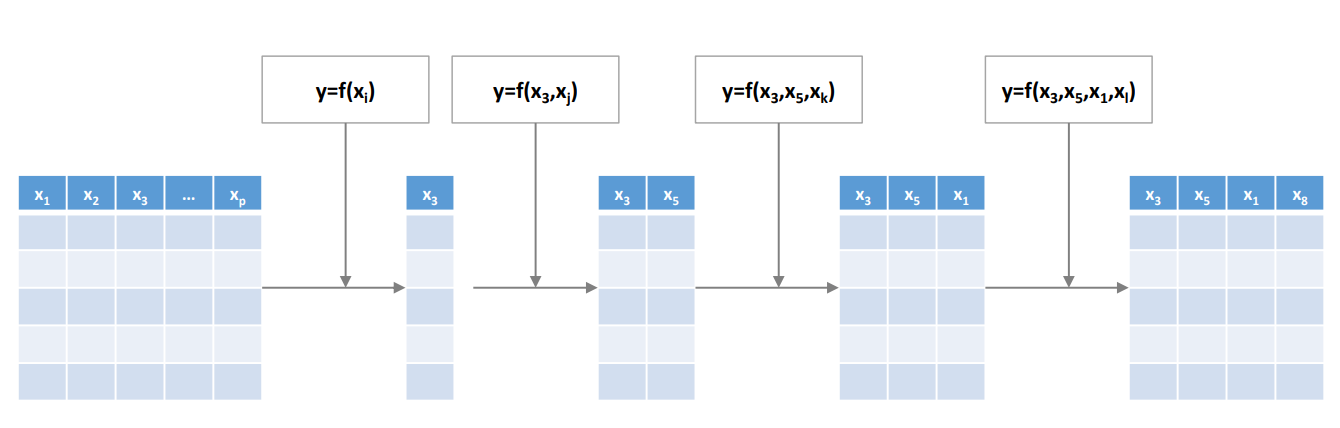

In [97]:
def variable_selection(model, X_train,y_train,X_val,y_val,direction):
    var = list(range(len(X_train.columns)))
    current_score, best_new_score = 0.0, 0.0
    if direction == "forward":
        inmodel  =[]
        outmodel = var
        while outmodel and current_score==best_new_score:
            score_candidate = []
            for candidate in outmodel:
                temp_var = inmodel + [candidate]
                Temp_X_train = X_train.iloc[:,temp_var]
                Temp_X_val   = X_val.iloc[:,temp_var]
                model.fit(Temp_X_train,y_train)
                prediction = model.predict(Temp_X_val)
                score = Acc(prediction>0.5,y_val,pri=False)
                score_candidate.append((score,candidate))
              
            score_candidate.sort()
            best_new_score, best_candidate = score_candidate.pop()
            if current_score>=best_new_score:
            #if current_score>=best_new_score and len(inmodel)>=15:
            #if current_score>=best_new_score and best_new_score>=0.943:
            #if current_score>=best_new_score or len(inmodel)==5:
                print("Finish:", inmodel)
                break
            else:
                outmodel.remove(best_candidate)
                inmodel.append(best_candidate)
                current_score = best_new_score
            
            print(inmodel)
            
        Temp_X_train = X_train.iloc[:,inmodel]
        Temp_X_val   = X_val.iloc[:,inmodel]
        model.fit(Temp_X_train,y_train)
        prediction = model.predict(Temp_X_val)
        score = Acc(prediction>0.5,y_val,pri=False)
        print("Best Validation Acc:",round(score*100,1),"%")
        print("선택된 변수의 개수:",len(inmodel),"개")
        
        return model, inmodel

In [98]:
#선형 회귀 모델에 대한 전진 선택법 적용 결과
model, inmodel = variable_selection(LinearRegression(), X_train,y_train,X_val,y_val,direction="forward")

[20]
[20, 46]
[20, 46, 3]
[20, 46, 3, 18]
[20, 46, 3, 18, 65]
[20, 46, 3, 18, 65, 43]
[20, 46, 3, 18, 65, 43, 67]
[20, 46, 3, 18, 65, 43, 67, 34]
Finish: [20, 46, 3, 18, 65, 43, 67, 34]
Best Validation Acc: 93.3 %
선택된 변수의 개수: 8 개


In [101]:
#선형 회귀 모델 전진 선택법 적용시 평가 데이터 셋에 대한 결과 확인
pred_test = model.predict(X_test.iloc[:,inmodel])
print("선형 회귀 모델-전진 선택법")
linear_forward = Acc(pred_test>0.5,y_test)
print("선택된 변수 개수:", len(inmodel))
print("Acc 증감:",round((linear_forward-linear_all)*100,1),"%")

선형 회귀 모델-전진 선택법
Accuracy: 91.6 %
선택된 변수 개수: 8
Acc 증감: -1.0 %


In [102]:
#로지스틱 회귀 모델에 대한 전진 선택법 적용 결과
model, inmodel = variable_selection(LogisticRegression(solver="lbfgs"), X_train,y_train,X_val,y_val,direction="forward")

[20]
[20, 46]
[20, 46, 65]
[20, 46, 65, 43]
[20, 46, 65, 43, 67]
[20, 46, 65, 43, 67, 22]
[20, 46, 65, 43, 67, 22, 55]
[20, 46, 65, 43, 67, 22, 55, 58]
Finish: [20, 46, 65, 43, 67, 22, 55, 58]
Best Validation Acc: 96.0 %
선택된 변수의 개수: 8 개


In [103]:
#로지스틱 회귀 모델 전진 선택법 적용시 평가 데이터 셋에 대한 결과 확인
pred_test = model.predict(X_test.iloc[:,inmodel])
print("로지스틱 회귀 모델-전진 선택법")
logistic_forward = Acc(pred_test,y_test)
print("선택된 변수 개수:", len(inmodel))
print("Acc 증감:",round((logistic_forward-logistic_all)*100,1),"%")

로지스틱 회귀 모델-전진 선택법
Accuracy: 92.7 %
선택된 변수 개수: 8
Acc 증감: -2.5 %


### Step 2. 후진 소거법
- 전체 변수로부터 시작해서 하나씩 변수를 제거하는 방식
- 적합도 함수를 활용해 해당 함수 값이 가장 높은 변수를 제거하는 방식
- Stopping Criteria를 통해 변수 선택을 중단함
    - 변수를 제거하여도 더 이상 증가하지 않음
    - 변수의 개수가 일정 개수 이하여야 stop 가능

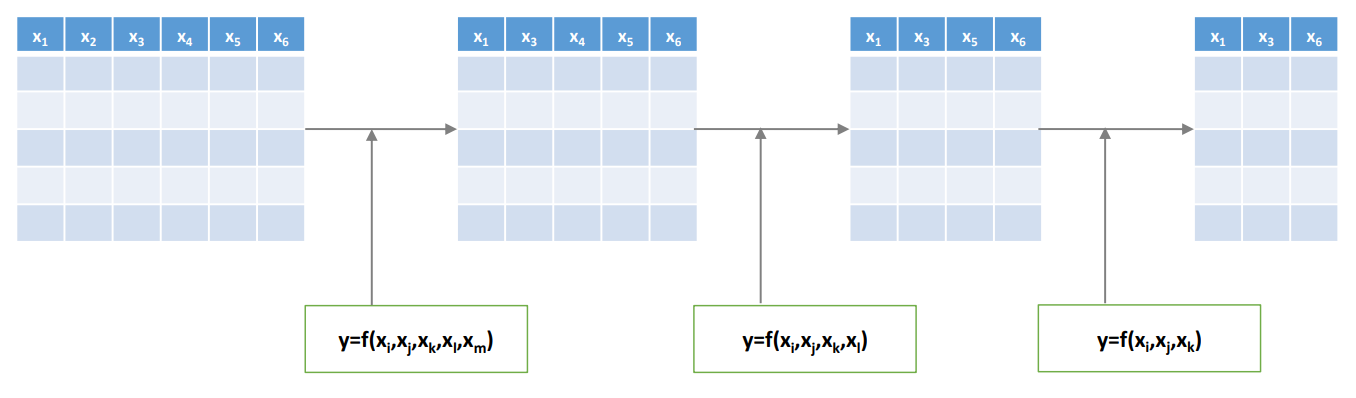

In [106]:
def variable_selection(model, X_train,y_train,X_val,y_val,direction):
    var = list(range(len(X_train.columns)))
    current_score, best_new_score = 0.0, 0.0
    if direction == "backward":
        inmodel  = var
        outmodel = []
        while inmodel and current_score==best_new_score:
            score_candidate = []
            for candidate in inmodel:
                temp_var = inmodel.copy()
                temp_var.remove(candidate)
                Temp_X_train = X_train.iloc[:,temp_var]
                Temp_X_val   = X_val.iloc[:,temp_var]
                model.fit(Temp_X_train,y_train)
                prediction = model.predict(Temp_X_val)
                score = Acc(prediction>0.5,y_val,pri=False)
                score_candidate.append((score,candidate))
              
            score_candidate.sort()
            best_new_score, best_candidate = score_candidate.pop()
            
            if current_score>=best_new_score:
            #if current_score>=best_new_score and len(inmodel)>=15:
            #if current_score>=best_new_score and best_new_score>=0.943:
            #if current_score>=best_new_score or len(inmodel)==5:
                print("Finish:", inmodel)
                break
            else:
                outmodel.append(best_candidate)
                inmodel.remove(best_candidate)
                current_score = best_new_score
                
            print(inmodel)
            
        Temp_X_train = X_train.iloc[:,inmodel]
        Temp_X_val   = X_val.iloc[:,inmodel]
        model.fit(Temp_X_train,y_train)
        prediction = model.predict(Temp_X_val)
        score = Acc(prediction>0.5,y_val,pri=False)
        print("Best Validation Acc:",round(score*100,1),"%")
        print("선택된 변수의 개수:",len(inmodel),"개")
        
        return model, inmodel

In [107]:
#선형 회귀 모델에 대한 후진 소거법 적용 결과
model, inmodel = variable_selection(LinearRegression(), X_train,y_train,X_val,y_val,direction="backward")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 

In [108]:
#선형 회귀 모델 후진 소거법 적용시 평가 데이터 셋에 대한 결과 확인
pred_test = model.predict(X_test.iloc[:,inmodel])
print("선형 회귀 모델-후진 소거법")
linear_backward = Acc(pred_test>0.5,y_test)
print("선택된 변수 개수:", len(inmodel))
print("Acc 증감:",round((linear_backward-linear_all)*100,1),"%")

선형 회귀 모델-후진 소거법
Accuracy: 92.5 %
선택된 변수 개수: 63
Acc 증감: 0.0 %


In [109]:
#로지스틱 회귀 모델에 대한 전진 선택법 적용 결과
model, inmodel = variable_selection(LogisticRegression(solver="lbfgs",max_iter=300), X_train,y_train,X_val,y_val,direction="backward")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 

In [111]:
#로지스틱 회귀 모델 후진 소거법 적용시 평가 데이터 셋에 대한 결과 확인
pred_test = model.predict(X_test.iloc[:,inmodel])
print("로지스틱 회귀 모델-후진 소거법")
logistic_backward = Acc(pred_test,y_test)
print("선택된 변수 개수:", len(inmodel))
print("Acc 증감:",round((logistic_backward-logistic_all)*100,1),"%")

로지스틱 회귀 모델-후진 소거법
Accuracy: 95.4 %
선택된 변수 개수: 63
Acc 증감: 0.2 %


### Step 3. 단계적 선택법
- 전진 선택법과 마찬가지로 변수가 하나도 없는 상태에서 시작
- 전진 선택법과 후진 선택법을 모두 적용하여 적합도 함수를 계산함
- 적합도 함수가 가장 높은 경우로 변수 선택 or 제거를 진행함
- Stopping Criteria를 통해 변수 선택을 중단함
    - 변수를 추가하거나 제거하여도 더 이상 성능이 증가하지 않음
    - 성능이 기준 이상을 만족
    - 변수의 개수가 일정 개수를 초과

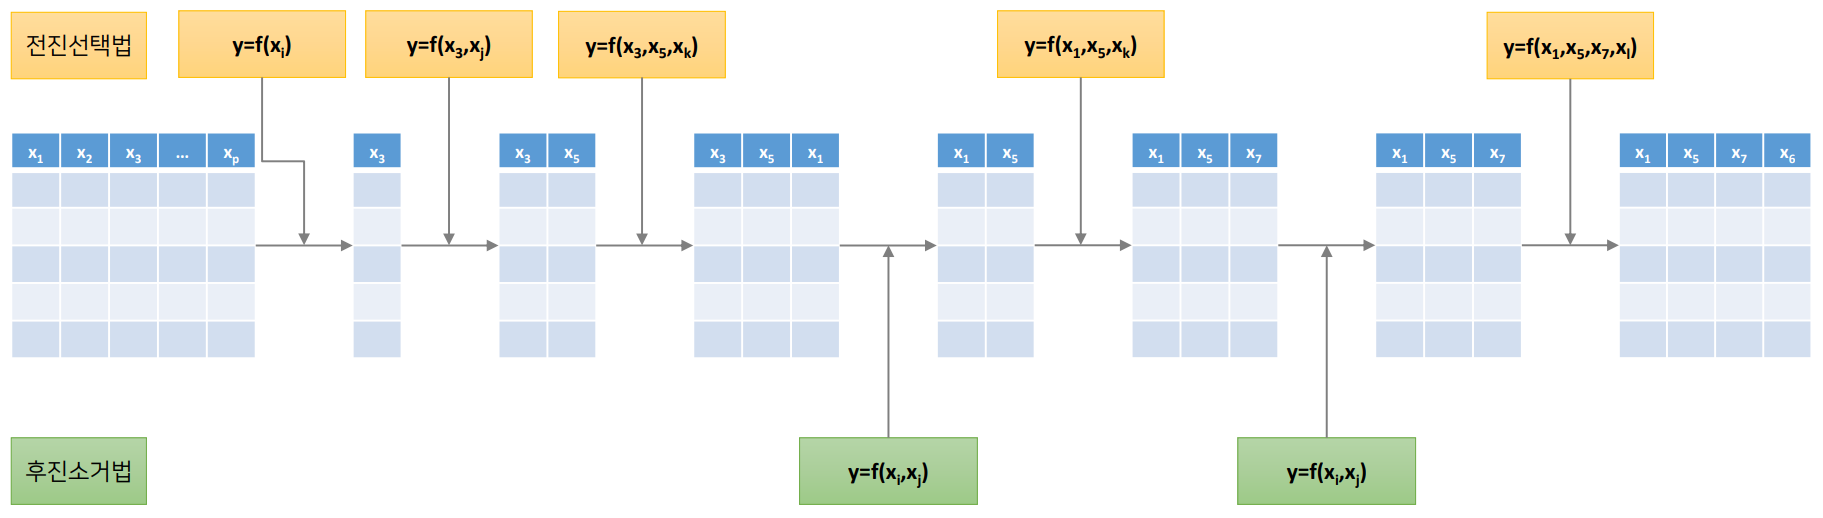

In [122]:
def variable_selection(model, X_train,y_train,X_val,y_val,direction):
    var = list(range(len(X_train.columns)))
    current_score, best_new_score = 0.0, 0.0
    if direction == "step":
        inmodel  =[]
        outmodel = var
        stop = 0
        count = 0
        forward = 0
        backward = 0
        while outmodel and stop<2:
            score_candidate = []
            count=count+1
            if count%2==1 or count==2:
                for candidate in outmodel:
                    temp_var = inmodel + [candidate]
                    Temp_X_train = X_train.iloc[:,temp_var]
                    Temp_X_val   = X_val.iloc[:,temp_var]
                    model.fit(Temp_X_train,y_train)
                    prediction = model.predict(Temp_X_val)
                    score = Acc(prediction>0.5,y_val,pri=False)
                    score_candidate.append((score,candidate))
              
                score_candidate.sort()
                best_new_score, best_candidate = score_candidate.pop()
                if current_score<best_new_score:
                    print("succes forward")
                    outmodel.remove(best_candidate)
                    inmodel.append(best_candidate)
                    current_score = best_new_score
                    stop=0
                    forward = forward+1
                else:
                    print("falis forward")
                    stop=stop+1
            else:
                for candidate in inmodel:
                    temp_var = inmodel.copy()
                    temp_var.remove(candidate)
                    Temp_X_train = X_train.iloc[:,temp_var]
                    Temp_X_val   = X_val.iloc[:,temp_var]
                    model.fit(Temp_X_train,y_train)
                    prediction = model.predict(Temp_X_val)
                    score = Acc(prediction>0.5,y_val,pri=False)
                    score_candidate.append((score,candidate))
                
                score_candidate.sort()
                best_new_score, best_candidate = score_candidate.pop()
                    
                if current_score<best_new_score:
                    print("succes backward")
                    outmodel.append(best_candidate)
                    inmodel.remove(best_candidate)
                    current_score = best_new_score
                    stop=0
                    backward = backward+1
                else:
                    print("fails backward")
                    stop=stop+1
                
            print(inmodel)
            
        Temp_X_train = X_train.iloc[:,inmodel]
        Temp_X_val   = X_val.iloc[:,inmodel]
        model.fit(Temp_X_train,y_train)
        prediction = model.predict(Temp_X_val)
        score = Acc(prediction>0.5,y_val,pri=False)
        print("Best Validation Acc:",round((score)*100,1),"%")
        print("선택된 변수의 개수:",len(inmodel),"개")
        print("succes forward:", forward)
        print("succes backward:", backward)
        
        return model, inmodel

In [123]:
#선형 회귀 모델에 대한 단계적 선택법 적용 결과
model, inmodel = variable_selection(LinearRegression(), X_train,y_train,X_val,y_val,direction="step")

succes forward
[20]
succes forward
[20, 46]
succes forward
[20, 46, 3]
fails backward
[20, 46, 3]
succes forward
[20, 46, 3, 18]
fails backward
[20, 46, 3, 18]
succes forward
[20, 46, 3, 18, 65]
fails backward
[20, 46, 3, 18, 65]
succes forward
[20, 46, 3, 18, 65, 43]
fails backward
[20, 46, 3, 18, 65, 43]
succes forward
[20, 46, 3, 18, 65, 43, 67]
fails backward
[20, 46, 3, 18, 65, 43, 67]
succes forward
[20, 46, 3, 18, 65, 43, 67, 34]
fails backward
[20, 46, 3, 18, 65, 43, 67, 34]
falis forward
[20, 46, 3, 18, 65, 43, 67, 34]
Best Validation Acc: 93.3 %
선택된 변수의 개수: 8 개
succes forward: 8
succes backward: 0


In [115]:
#선형 회귀 모델 단계적 선택법 적용시 평가 데이터 셋에 대한 결과 확인
pred_test = model.predict(X_test.iloc[:,inmodel])
print("선형 회귀 모델-단계적 소거법")
linear_step = Acc(pred_test>0.5,y_test)
print("선택된 변수 개수:", len(inmodel))
print("Acc 증감:",round((linear_step-linear_all)*100,1),"%")

선형 회귀 모델-단계적 소거법
Accuracy: 91.6 %
선택된 변수 개수: 8
Acc 증감: -1.0 %


In [116]:
#로지스틱 회귀 모델에 대한 단계적 선택법 적용 결과
model, inmodel = variable_selection(LogisticRegression(solver="lbfgs",max_iter=300), X_train,y_train,X_val,y_val,direction="step")

succes forward
[20]
succes forward
[20, 46]
succes forward
[20, 46, 65]
fails backward
[20, 46, 65]
succes forward
[20, 46, 65, 43]
fails backward
[20, 46, 65, 43]
succes forward
[20, 46, 65, 43, 67]
fails backward
[20, 46, 65, 43, 67]
succes forward
[20, 46, 65, 43, 67, 22]
fails backward
[20, 46, 65, 43, 67, 22]
succes forward
[20, 46, 65, 43, 67, 22, 55]
fails backward
[20, 46, 65, 43, 67, 22, 55]
succes forward
[20, 46, 65, 43, 67, 22, 55, 58]
fails backward
[20, 46, 65, 43, 67, 22, 55, 58]
falis forward
[20, 46, 65, 43, 67, 22, 55, 58]
Best Validation Acc: 0.9596928982725528
선택된 변수의 개수: 8 개
succes forward: 8
succes backward: 0


In [119]:
#로지스틱 회귀 모델 단계적 선택법 적용시 평가 데이터 셋에 대한 결과 확인
pred_test = model.predict(X_test.iloc[:,inmodel])
print("로지스틱 회귀 모델-단계적 선택법")
logistic_step = Acc(pred_test,y_test)
print("선택된 변수 개수:", len(inmodel))
print("Acc 증감:",round((logistic_step-logistic_all)*100,1),"%")

로지스틱 회귀 모델-단계적 선택법
Accuracy: 92.7 %
선택된 변수 개수: 8
Acc 증감: -2.5 %


In [124]:
def variable_selection(model, X_train,y_train,X_val,y_val,direction):
    var = list(range(len(X_train.columns)))
    current_score, best_new_score = 0.0, 0.0
    if direction == "step2":
        inmodel  = var
        outmodel = []
        stop = 0
        count = 0
        forward = 0
        backward = 0
        while inmodel and stop<2:
            score_candidate = []
            count=count+1
            if count%2==0 and count!=2:
                for candidate in outmodel:
                    temp_var = inmodel + [candidate]
                    Temp_X_train = X_train.iloc[:,temp_var]
                    Temp_X_val   = X_val.iloc[:,temp_var]
                    model.fit(Temp_X_train,y_train)
                    prediction = model.predict(Temp_X_val)
                    score = Acc(prediction>0.5,y_val,pri=False)
                    score_candidate.append((score,candidate))
              
                score_candidate.sort()
                best_new_score, best_candidate = score_candidate.pop()
                if current_score<best_new_score:
                    print("succes forward")
                    outmodel.remove(best_candidate)
                    inmodel.append(best_candidate)
                    current_score = best_new_score
                    stop=0
                    forward = forward+1
                else:
                    print("falis forward")
                    stop=stop+1
            else:
                for candidate in inmodel:
                    temp_var = inmodel.copy()
                    temp_var.remove(candidate)
                    Temp_X_train = X_train.iloc[:,temp_var]
                    Temp_X_val   = X_val.iloc[:,temp_var]
                    model.fit(Temp_X_train,y_train)
                    prediction = model.predict(Temp_X_val)
                    score = Acc(prediction>0.5,y_val,pri=False)
                    score_candidate.append((score,candidate))
                
                score_candidate.sort()
                best_new_score, best_candidate = score_candidate.pop()
                    
                if current_score<best_new_score:
                    print("succes backward")
                    outmodel.append(best_candidate)
                    inmodel.remove(best_candidate)
                    current_score = best_new_score
                    stop=0
                    backward = backward+1
                else:
                    print("fails backward")
                    stop=stop+1
                
            print(inmodel)
            
        Temp_X_train = X_train.iloc[:,inmodel]
        Temp_X_val   = X_val.iloc[:,inmodel]
        model.fit(Temp_X_train,y_train)
        prediction = model.predict(Temp_X_val)
        score = Acc(prediction>0.5,y_val,pri=False)
        print("Best Validation Acc:",round((score)*100,1),"%")
        print("선택된 변수의 개수:",len(inmodel),"개")
        print("succes forward:", forward)
        print("succes backward:", backward)
        
        return model, inmodel

In [125]:
#선형 회귀 모델에 대한 단계적 선택법2 적용 결과
model, inmodel = variable_selection(LinearRegression(), X_train,y_train,X_val,y_val,direction="step2")

succes backward
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
succes backward
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
succes backward
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
falis forward
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46

In [126]:
#선형 회귀 모델 단계적 선택법2 적용시 평가 데이터 셋에 대한 결과 확인
pred_test = model.predict(X_test.iloc[:,inmodel])
print("선형 회귀 모델-단계적 선택법2")
linear_step2 = Acc(pred_test>0.5,y_test)
print("선택된 변수 개수:", len(inmodel))
print("Acc 증감:",round((linear_step2-linear_all),1),"%")

선형 회귀 모델-단계적 선택법2
Accuracy: 92.5 %
선택된 변수 개수: 63
Acc 증감: 0.0


In [127]:
#로지스틱 회귀 모델에 대한 전진 선택법2 적용 결과
model, inmodel = variable_selection(LogisticRegression(solver="lbfgs",max_iter=300), X_train,y_train,X_val,y_val,direction="step2")

succes backward
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67]
succes backward
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67]
succes backward
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67]
falis forward
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47

In [128]:
#로지스틱 회귀 모델 단계적 선택법2 적용시 평가 데이터 셋에 대한 결과 확인
pred_test = model.predict(X_test.iloc[:,inmodel])
print("로지스틱 회귀 모델-단계적 선택법2")
logistic_step2 = Acc(pred_test,y_test)
print("선택된 변수 개수:", len(inmodel))
print("Acc 증감:",round((logistic_step2-logistic_all)*100,1),"%")

로지스틱 회귀 모델-단계적 선택법2
Accuracy: 95.4 %
선택된 변수 개수: 63
Acc 증감: 0.2 %


### Step 4. 변수 선택법 함수

In [129]:
def variable_selection(model, X_train,y_train,X_val,y_val,direction):
    var = list(range(len(X_train.columns)))
    current_score, best_new_score = 0.0, 0.0
    ### 전진 선택법
    if direction == "forward":
        inmodel  =[]
        outmodel = var
        while outmodel and current_score==best_new_score:
            score_candidate = []
            for candidate in outmodel:
                temp_var = inmodel + [candidate]
                Temp_X_train = X_train.iloc[:,temp_var]
                Temp_X_val   = X_val.iloc[:,temp_var]
                model.fit(Temp_X_train,y_train)
                prediction = model.predict(Temp_X_val)
                score = Acc(prediction>0.5,y_val,pri=False)
                score_candidate.append((score,candidate))
              
            score_candidate.sort()
            best_new_score, best_candidate = score_candidate.pop()
            if current_score>=best_new_score:
                print(inmodel)
                break
            else:
                outmodel.remove(best_candidate)
                inmodel.append(best_candidate)
                current_score = best_new_score
            
            print(inmodel)
            
        Temp_X_train = X_train.iloc[:,inmodel]
        Temp_X_val   = X_val.iloc[:,inmodel]
        model.fit(Temp_X_train,y_train)
        prediction = model.predict(Temp_X_val)
        score = Acc(prediction>0.5,y_val,pri=False)
        print("Best Validation Acc:",round((score)*100,1),"%")
        print("선택된 변수의 개수:",len(inmodel),"개")
    
    ###후진 소거법
    if direction == "backward":
        inmodel  = var
        outmodel = []
        while inmodel and current_score==best_new_score:
            score_candidate = []
            for candidate in inmodel:
                temp_var = inmodel.copy()
                temp_var.remove(candidate)
                Temp_X_train = X_train.iloc[:,temp_var]
                Temp_X_val   = X_val.iloc[:,temp_var]
                model.fit(Temp_X_train,y_train)
                prediction = model.predict(Temp_X_val)
                score = Acc(prediction>0.5,y_val,pri=False)
                score_candidate.append((score,candidate))
              
            score_candidate.sort()
            best_new_score, best_candidate = score_candidate.pop()
            
            if current_score>=best_new_score:
                print(inmodel)
                break
            else:
                outmodel.append(best_candidate)
                inmodel.remove(best_candidate)
                current_score = best_new_score
                
            print(inmodel)
            
        Temp_X_train = X_train.iloc[:,inmodel]
        Temp_X_val   = X_val.iloc[:,inmodel]
        model.fit(Temp_X_train,y_train)
        prediction = model.predict(Temp_X_val)
        score = Acc(prediction>0.5,y_val,pri=False)
        print("Best Validation Acc:",round((score)*100,1),"%")
        print("선택된 변수의 개수:",len(inmodel),"개")
        
    ###단계적 선택법
    if direction == "step":
        inmodel  =[]
        outmodel = var
        stop = 0
        count = 0
        forward = 0
        backward = 0
        while outmodel and stop<2:
            score_candidate = []
            count=count+1
            if count%2==1 or count==2:
                for candidate in outmodel:
                    temp_var = inmodel + [candidate]
                    Temp_X_train = X_train.iloc[:,temp_var]
                    Temp_X_val   = X_val.iloc[:,temp_var]
                    model.fit(Temp_X_train,y_train)
                    prediction = model.predict(Temp_X_val)
                    score = Acc(prediction>0.5,y_val,pri=False)
                    score_candidate.append((score,candidate))
              
                score_candidate.sort()
                best_new_score, best_candidate = score_candidate.pop()
                if current_score<best_new_score:
                    print("succes forward")
                    outmodel.remove(best_candidate)
                    inmodel.append(best_candidate)
                    current_score = best_new_score
                    stop=0
                    forward = forward+1
                else:
                    print("falis forward")
                    stop=stop+1
            else:
                for candidate in inmodel:
                    temp_var = inmodel.copy()
                    temp_var.remove(candidate)
                    Temp_X_train = X_train.iloc[:,temp_var]
                    Temp_X_val   = X_val.iloc[:,temp_var]
                    model.fit(Temp_X_train,y_train)
                    prediction = model.predict(Temp_X_val)
                    score = Acc(prediction>0.5,y_val,pri=False)
                    score_candidate.append((score,candidate))
                
                score_candidate.sort()
                best_new_score, best_candidate = score_candidate.pop()
                    
                if current_score<best_new_score:
                    print("succes backward")
                    outmodel.append(best_candidate)
                    inmodel.remove(best_candidate)
                    current_score = best_new_score
                    stop=0
                    backward = backward+1
                else:
                    print("fails backward")
                    stop=stop+1
                
            print(inmodel)
            
        Temp_X_train = X_train.iloc[:,inmodel]
        Temp_X_val   = X_val.iloc[:,inmodel]
        model.fit(Temp_X_train,y_train)
        prediction = model.predict(Temp_X_val)
        score = Acc(prediction>0.5,y_val,pri=False)
        print("Best Validation Acc:",round((score)*100,1),"%")
        print("선택된 변수의 개수:",len(inmodel),"개")
        print("succes forward:", forward)
        print("succes backward:", backward)
        
    return model, inmodel

In [130]:
#Example
model, inmodel = variable_selection(LogisticRegression(solver="lbfgs",max_iter=300), X_train,y_train,X_val,y_val,direction="forward")

[20]
[20, 46]
[20, 46, 65]
[20, 46, 65, 43]
[20, 46, 65, 43, 67]
[20, 46, 65, 43, 67, 22]
[20, 46, 65, 43, 67, 22, 55]
[20, 46, 65, 43, 67, 22, 55, 58]
[20, 46, 65, 43, 67, 22, 55, 58]
Best Validation Acc: 96.0 %
선택된 변수의 개수: 8 개
